In [1]:
import numpy as np
import sys
import os
import os.path as osp
from tqdm import tqdm
from typing import Union, List
# from tabulate import tabulate, SEPARATING_LINE

import sys
import mdtraj as md
import matplotlib.pyplot as plt

---

## Data processing

In [26]:
shape = 'layer'
dataset_folder = '../../DATA/InterfaceDataset/'

In [ ]:
L = []
PHI = []
THETA = []
DELTA = []
SIZE = []

for iter_folder in tqdm(os.listdir(osp.join(dataset_folder, shape))):
    for file in os.listdir(osp.join(dataset_folder, shape, iter_folder)):
        _, l, phi, theta, delta = osp.splitext(file)[0].split('_')

        L.append(float(l))
        PHI.append(float(phi))
        THETA.append(float(theta))
        DELTA.append(float(delta))

        structure = md.load(osp.join(dataset_folder, shape, iter_folder, file))
        SIZE.append(structure.n_atoms)

L = np.array(L)
PHI = np.array(PHI)
THETA = np.array(THETA)
DELTA = np.array(DELTA)
SIZE = np.array(SIZE)

In [18]:
output_file = osp.join(dataset_folder, shape, "statistics.txt")
output_data = np.column_stack((L, PHI, THETA, DELTA, SIZE))
header = "l\tphi\ttheta\tdelta\tsize"
np.savetxt(output_file, output_data, delimiter="\t", header=header, comments="")

---

## Data analysing

In [9]:
def plot_distribution(
    X: Union[np.array, List],
    Y: Union[np.array, List],
    X_init: Union[np.array, List],
    Y_init: Union[np.array, List],
    xticks: Union[np.array, List] = None,
    yticks: Union[np.array, List] = None,
    xlabel: str = '',
    ylabel: str = '',
    color: str = None
):
    # plt.figure(figsize=(8, 6))
    plt.grid(alpha=0.5, zorder=0)

    for x in X_init:
        for y in Y_init:
            plt.scatter(x, y, s=50, color='black', zorder=2)

    plt.scatter(X, Y, s=40, color=color, alpha=0.3, zorder=1)

    plt.xticks(xticks, xticks, fontsize=12)
    plt.yticks(yticks, yticks, fontsize=12)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # plt.show()

In [27]:
# Reading data, if necessary
L, PHI, THETA, DELTA, SIZE = np.loadtxt(osp.join(dataset_folder, shape, "statistics.txt"), skiprows=1, unpack=True)

In [28]:
colors = {
    "droplet": "#ea3930",
    "doughnut": "#ffb534",
    "worm": "#3499e8",
    "roll": "#a946ff",
    "perforation": "#32ff92",
    "layer": "#a9a9a9"
}

color = colors[shape]

In [ ]:
# phi vs l

plot_distribution(
    X=PHI,
    Y=L,
    X_init=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
    Y_init=[1, 2, 3, 4],
    xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    yticks=[1, 2, 3, 4],
    xlabel=r'$\phi$',
    ylabel=r'$l$',
    color=color
)

In [ ]:
# phi vs theta

plot_distribution(
    X=PHI,
    Y=THETA,
    X_init=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
    Y_init=[91, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    yticks=[90, 105, 120, 135, 150, 165, 180],
    xlabel=r'$\phi$',
    ylabel=r'$\theta$',
    color=color
)

In [ ]:
# phi vs delta

plot_distribution(
    X=PHI,
    Y=DELTA,
    X_init=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
    Y_init=[0, 0.05, 0.1, 0.15, 0.2],
    xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    yticks=None,
    xlabel=r'$\phi$',
    ylabel=r'$\delta$',
    color=color
)

In [ ]:
# l vs theta

plot_distribution(
    X=L,
    Y=THETA,
    X_init=[1, 2, 3, 4],
    Y_init=[91, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    xticks=[1, 2, 3, 4],
    yticks=[90, 105, 120, 135, 150, 165, 180],
    xlabel=r'$l$',
    ylabel=r'$\theta$',
    color=color
)

In [ ]:
# l vs delta

plot_distribution(
    X=L,
    Y=DELTA,
    X_init=[1, 2, 3, 4],
    Y_init=[0, 0.05, 0.1, 0.15, 0.2],
    xticks=[1, 2, 3, 4],
    yticks=None,
    xlabel=r'$l$',
    ylabel=r'$\delta$',
    color=color
)

In [ ]:
# theta vs delta

plot_distribution(
    X=THETA,
    Y=DELTA,
    X_init=[91, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    Y_init=[0, 0.05, 0.1, 0.15, 0.2],
    xticks=[90, 105, 120, 135, 150, 165, 180],
    yticks=None,
    xlabel=r'$\theta$',
    ylabel=r'$\delta$',
    color=color
)

In [ ]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5, zorder=1)

plt.hist(SIZE, bins=100, color=color, zorder=2)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('size', fontsize=14)
plt.ylabel('number of conformations', fontsize=14)
plt.show()

In [29]:
print("{:.2f} +- {:.2f}".format(np.mean(SIZE), np.std(SIZE)))

2454.77 +- 2057.05


---

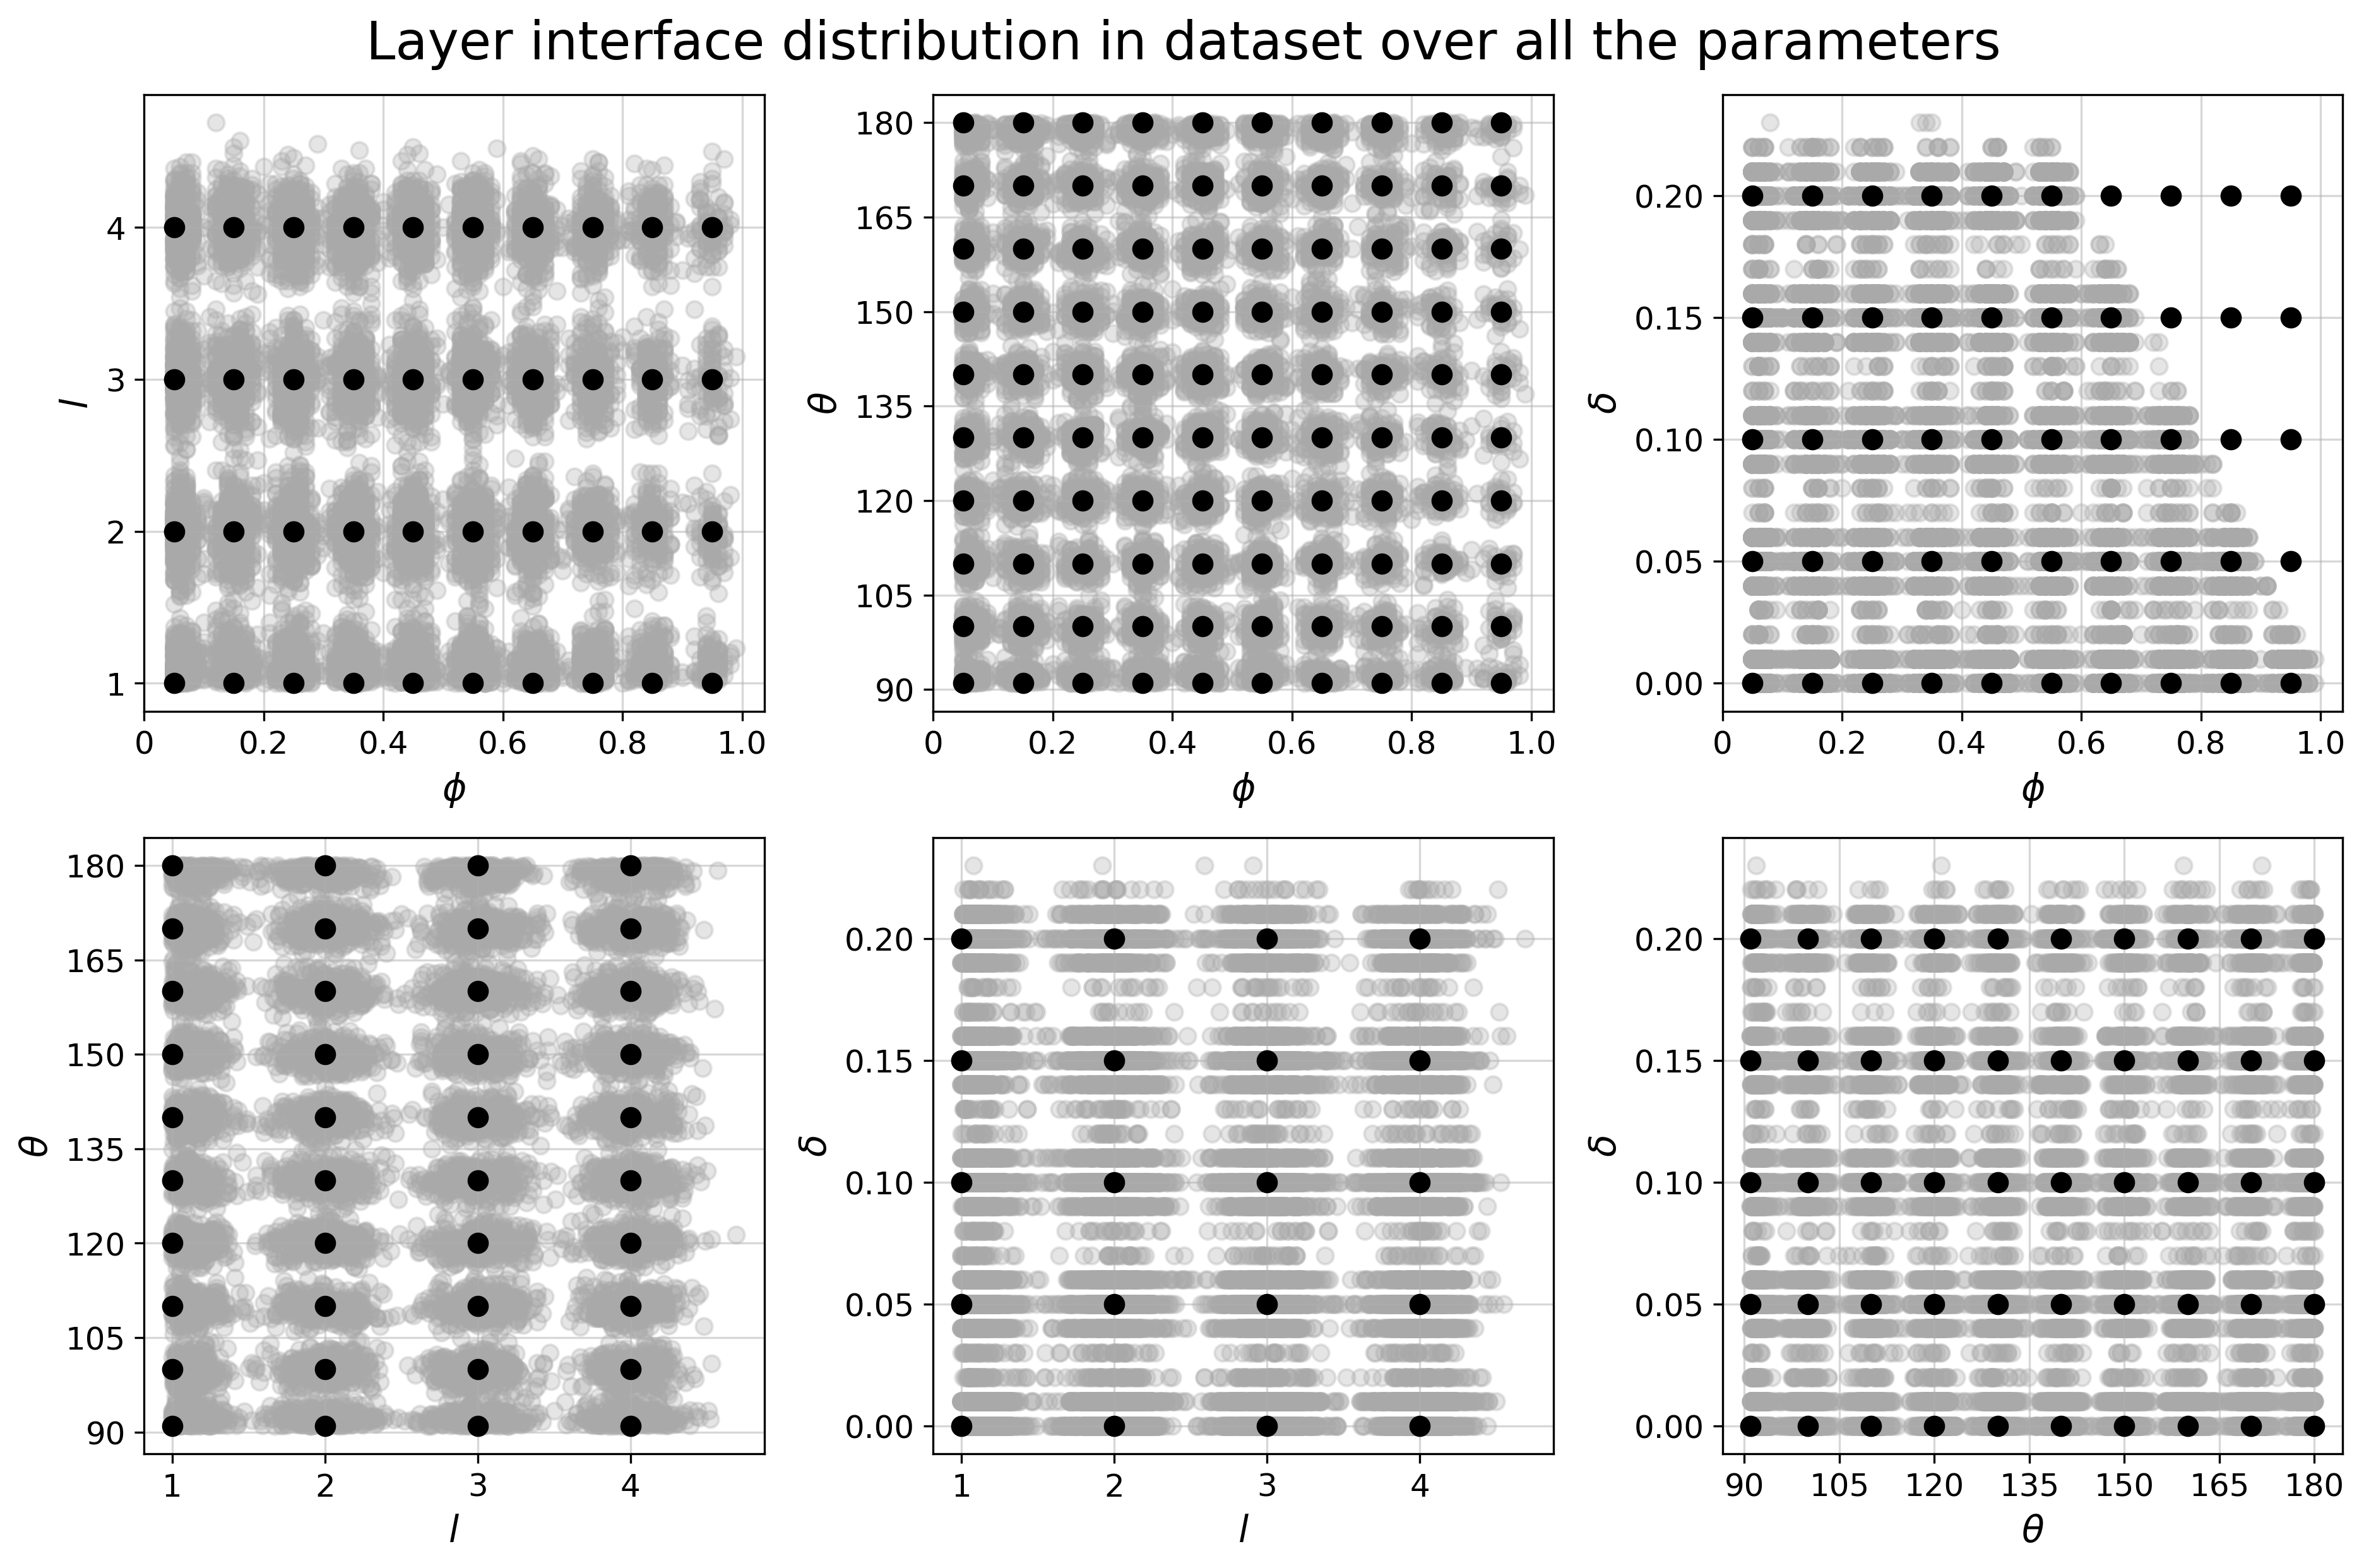

In [29]:
import matplotlib.pyplot as plt

size = 0.7
fig, axes = plt.subplots(2, 3, figsize=(18 * size, 12 * size), dpi=300)

# phi vs l
plt.sca(axes[0, 0])
plot_distribution(
    X=PHI,
    Y=L,
    X_init=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
    Y_init=[1, 2, 3, 4],
    xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    yticks=[1, 2, 3, 4],
    xlabel=r'$\phi$',
    ylabel=r'$l$',
    color=color
)
# plt.title(r'$\phi$ vs $l$')

# phi vs theta
plt.sca(axes[0, 1])
plot_distribution(
    X=PHI,
    Y=THETA,
    X_init=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
    Y_init=[91, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    yticks=[90, 105, 120, 135, 150, 165, 180],
    xlabel=r'$\phi$',
    ylabel=r'$\theta$',
    color=color
)
# plt.title(r'$\phi$ vs $\theta$')

# phi vs delta
plt.sca(axes[0, 2])
plot_distribution(
    X=PHI,
    Y=DELTA,
    X_init=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
    Y_init=[0, 0.05, 0.1, 0.15, 0.2],
    xticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    yticks=None,
    xlabel=r'$\phi$',
    ylabel=r'$\delta$',
    color=color
)
# plt.title(r'$\phi$ vs $\delta$')

# l vs theta
plt.sca(axes[1, 0])
plot_distribution(
    X=L,
    Y=THETA,
    X_init=[1, 2, 3, 4],
    Y_init=[91, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    xticks=[1, 2, 3, 4],
    yticks=[90, 105, 120, 135, 150, 165, 180],
    xlabel=r'$l$',
    ylabel=r'$\theta$',
    color=color
)
# plt.title(r'$l$ vs $\theta$')

# l vs delta
plt.sca(axes[1, 1])
plot_distribution(
    X=L,
    Y=DELTA,
    X_init=[1, 2, 3, 4],
    Y_init=[0, 0.05, 0.1, 0.15, 0.2],
    xticks=[1, 2, 3, 4],
    yticks=None,
    xlabel=r'$l$',
    ylabel=r'$\delta$',
    color=color
)
# plt.title(r'$l$ vs $\delta$')

# theta vs delta
plt.sca(axes[1, 2])
plot_distribution(
    X=THETA,
    Y=DELTA,
    X_init=[91, 100, 110, 120, 130, 140, 150, 160, 170, 180],
    Y_init=[0, 0.05, 0.1, 0.15, 0.2],
    xticks=[90, 105, 120, 135, 150, 165, 180],
    yticks=None,
    xlabel=r'$\theta$',
    ylabel=r'$\delta$',
    color=color
)
# plt.title(r'$\theta$ vs $\delta$')

fig.suptitle(f"{shape.capitalize()} interface distribution in dataset over all the parameters", fontsize=20) # Add this line
plt.tight_layout()
# plt.show()
fig.savefig(f'../img/Article2_panda_nn/{shape}_dataset_distibution.png', dpi=300, bbox_inches='tight')

---

In [5]:
shapes = ['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer']
dataset_folder = '../data/Interface_test/'
min = 0

result = []
for shape in shapes:
    # Reading data, if necessary
    _, _, _, _, SIZE = np.loadtxt(osp.join(dataset_folder, shape, "statistics.txt"), skiprows=1, unpack=True)

    num = len(np.argwhere(SIZE >= min))
    mean = np.mean(SIZE[np.argwhere(SIZE >= min)])
    std = np.std(SIZE[np.argwhere(SIZE >= min)])
    result.append([shape, num, int(mean), int(std)])

print(
    tabulate(
        result,
        headers=["Shape", "num", "mean", "std"],
        tablefmt="github",
    )
)

| Shape       |   num |   mean |   std |
|-------------|-------|--------|-------|
| droplet     |  9760 |   1461 |  1246 |
| doughnut    | 11047 |   1693 |  1336 |
| worm        | 12628 |   1720 |  1718 |
| roll        | 13342 |   2429 |  1856 |
| perforation |  9688 |   3094 |  2023 |
| layer       | 12790 |   2454 |  2057 |


In [ ]:
| Shape       |   num |   mean |   std |
|-------------|-------|--------|-------|
| droplet     |  9760 |   1461 |  1246 |
| doughnut    | 11047 |   1693 |  1336 |
| worm        | 12628 |   1720 |  1718 |
| roll        | 13342 |   2429 |  1856 |
| perforation |  9688 |   3094 |  2023 |
| layer       | 12790 |   2454 |  2057 |

In [6]:
result

[['droplet', 9760, 1461, 1246],
 ['doughnut', 11047, 1693, 1336],
 ['worm', 12628, 1720, 1718],
 ['roll', 13342, 2429, 1856],
 ['perforation', 9688, 3094, 2023],
 ['layer', 12790, 2454, 2057]]

In [71]:
def _get_files_recursively(directory, extention):
    file_list = []
    for root, dirs, files in os.walk(directory):
        # print('1)', root)
        # print('2)', dirs)
        # print('3)', files)
        for file in files:
            subdir = os.path.basename(root)

            if extention is None:
                file_list.append(osp.join(subdir, file))
            elif file.endswith(extention):
                file_list.append(osp.join(subdir, file))

    return file_list

In [40]:
[subdir for subdir in os.listdir(dataset_folder) if osp.isdir(osp.join(dataset_folder, subdir))]

['droplet_backup',
 'layer',
 'worm',
 'roll',
 'droplet',
 'perforation',
 'doughnut']

In [67]:
arr = [
    osp.join(subdir, file)
    for subdir in os.listdir(dataset_folder) if osp.isdir(osp.join(dataset_folder, subdir))
    for file in _get_files_recursively(osp.join(dataset_folder, subdir), '.gro')
]

subdir iter_2 droplet_2.02_0.06_139.52_0.05.gro
subdir iter_2 droplet_2.55_0.14_101.35_0.05.gro
subdir iter_2 droplet_1.80_0.05_113.29_0.15.gro
subdir iter_2 droplet_1.81_0.05_152.81_0.16.gro
subdir iter_2 droplet_1.29_0.16_91.10_0.00.gro
subdir iter_2 droplet_1.19_0.15_110.93_0.19.gro
subdir iter_2 droplet_1.03_0.25_119.60_0.06.gro
subdir iter_2 droplet_1.00_0.25_141.89_0.09.gro
subdir iter_2 droplet_1.94_0.12_117.47_0.10.gro
subdir iter_2 droplet_1.71_0.17_152.76_0.01.gro
subdir iter_2 droplet_1.11_0.23_100.47_0.06.gro
subdir iter_2 droplet_1.71_0.08_161.49_0.04.gro
subdir iter_2 droplet_1.31_0.17_91.40_0.10.gro
subdir iter_2 droplet_2.10_0.06_128.76_0.04.gro
subdir iter_2 droplet_1.15_0.08_139.78_0.20.gro
subdir iter_2 droplet_2.11_0.05_101.35_0.10.gro
subdir iter_2 droplet_1.10_0.16_142.00_0.05.gro
subdir iter_2 droplet_1.02_0.35_117.91_0.15.gro
subdir iter_2 droplet_1.10_0.23_99.65_0.15.gro
subdir iter_2 droplet_1.26_0.16_169.93_0.01.gro
subdir iter_2 droplet_1.03_0.05_99.03_0.15.

In [61]:
os.path.basename('../data/Interface_test/droplet_backup/iter_2')

'iter_2'

In [68]:
arr[-1]

'doughnut/iter_6/doughnut_4.11_0.46_156.43_0.16.gro'

In [72]:
_get_files_recursively(osp.join(dataset_folder, 'droplet'), '.gro')

['iter_14/droplet_1.14_0.15_123.33_0.10.gro',
 'iter_14/droplet_2.92_0.05_159.14_0.00.gro',
 'iter_14/droplet_1.26_0.14_150.56_0.05.gro',
 'iter_14/droplet_1.14_0.08_158.79_0.01.gro',
 'iter_14/droplet_4.18_0.07_91.62_0.05.gro',
 'iter_14/droplet_1.83_0.14_179.64_0.01.gro',
 'iter_14/droplet_1.08_0.24_120.86_0.09.gro',
 'iter_14/droplet_1.10_0.06_139.49_0.19.gro',
 'iter_14/droplet_1.08_0.06_140.97_0.05.gro',
 'iter_14/droplet_1.21_0.16_111.20_0.15.gro',
 'iter_14/droplet_1.80_0.07_110.98_0.05.gro',
 'iter_14/droplet_1.09_0.25_129.69_0.06.gro',
 'iter_14/droplet_1.17_0.05_177.04_0.01.gro',
 'iter_14/droplet_2.20_0.12_108.63_0.11.gro',
 'iter_14/droplet_1.97_0.14_93.87_0.15.gro',
 'iter_14/droplet_2.25_0.06_148.15_0.01.gro',
 'iter_14/droplet_2.94_0.05_150.28_0.05.gro',
 'iter_14/droplet_1.00_0.15_110.96_0.10.gro',
 'iter_14/droplet_1.23_0.45_125.99_0.01.gro',
 'iter_14/droplet_1.06_0.06_102.14_0.05.gro',
 'iter_14/droplet_1.13_0.06_169.93_0.20.gro',
 'iter_14/droplet_1.43_0.08_142.01_0

In [73]:
os.path.basename('iter_27/droplet_1.11_0.07_99.53_0.05.gro')

'droplet_1.11_0.07_99.53_0.05.gro'

In [76]:
osp.splitext('droplet_1.11_0.07_99.53_0.05.gro')[0]

'droplet_1.11_0.07_99.53_0.05'